In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv(r'D:\nam_3\data_analysis\BTL\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


-   check the size of dataset

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#   Describe the dataset
-   RowNumber: A sequential identifier for each row in the dataset.
-   CustomerId: Unique identifier for each customer.
-   Surname: Last name of the customer.
-   CreditScore: The credit score of the customer.
-   Geography: The country where the customer is located.
-   Gender: Gender of the customer.
-   Age: Age of the customer.
-   Tenure: Number of years the customer has been with the company.
-   Balance: Bank balance of the customer.
-   NumOfProducts: Number of products held by the customer.
-   HasCrCard: Whether the customer has a credit card (1 for yes, 0 for no).
-   IsActiveMember: Whether the customer is an active member (1 for yes, 0 for no).
-   EstimatedSalary: Estimated salary of the customer.
-   Exited: Whether the customer churned (1 for yes, 0 for no).

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df["CreditScore"].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [9]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [10]:
df.describe(include="object")

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


#   Data Wrangling
-   Data wrangling, also known as data munging, refers to the process of cleaning, transforming, and preparing raw data for analysis.
-   It involves handling missing values, addressing inconsistencies and formatting data before it can be used for further analysis.

In [11]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
247,248,15599792,Dimauro,545,France,Female,26,1,0.00,2,1,1,199638.56,0
6867,6868,15575619,Teakle,656,Spain,Female,32,1,104254.27,1,1,1,17034.37,0
3357,3358,15670668,Webb,658,Germany,Male,29,5,75395.53,2,0,1,54914.92,0
530,531,15736112,Walton,519,Spain,Female,57,2,119035.35,2,1,1,29871.79,0
4482,4483,15811970,Kang,653,France,Female,42,1,0.00,2,1,1,5768.32,0
4740,4741,15618661,Chidubem,535,France,Male,30,6,103804.97,1,1,1,125710.53,0
3947,3948,15719950,Sutherland,682,France,Male,61,10,73688.20,1,1,1,172141.33,0
596,597,15697183,Uchenna,685,Spain,Male,43,9,0.00,2,1,0,107811.28,0
1035,1036,15652955,Price,678,Spain,Male,30,0,0.00,1,1,0,35113.08,0
9143,9144,15793197,Bailey,676,France,Female,34,8,100359.54,1,0,0,46038.28,0


In [12]:
# Drop insignificant columns
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [13]:
df.rename(columns={"Exited":"Churned"},inplace=True)
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


In [14]:
count = df["Churned"].value_counts()
print(count)

Churned
No     7963
Yes    2037
Name: count, dtype: int64


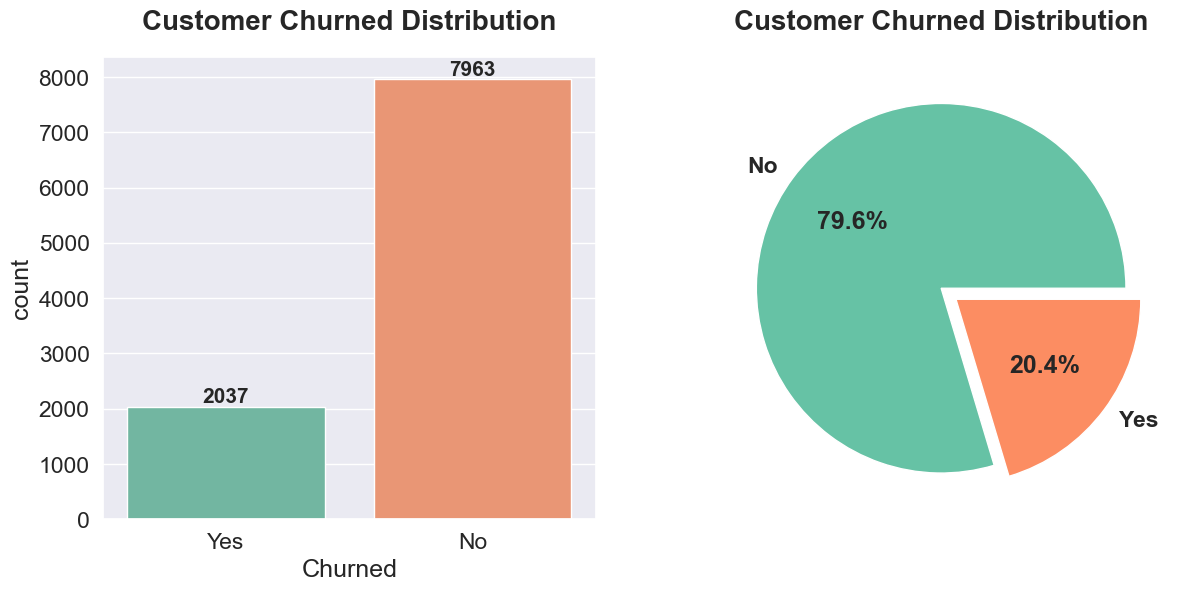

In [15]:
# Count the values of the "Churned" column
count = df["Churned"].value_counts()

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the count plot
sns.countplot(data=df, x="Churned", palette="Set2", ax=axes[0])
axes[0].set_title("Customer Churned Distribution", fontweight="bold", size=20, pad=20)

# Add labels to the bars in the count plot
for container in axes[0].containers:
    axes[0].bar_label(container, fontweight="bold", size=15)

# Plot the pie chart
axes[1].pie(count, labels=count.index, autopct="%1.1f%%", colors=sns.color_palette("Set2"), explode=[0, 0.1],
            textprops={"fontweight": "bold"})
axes[1].set_title("Customer Churned Distribution", fontweight="bold", size=20, pad=20)

# Display the plot
plt.show()

In [16]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

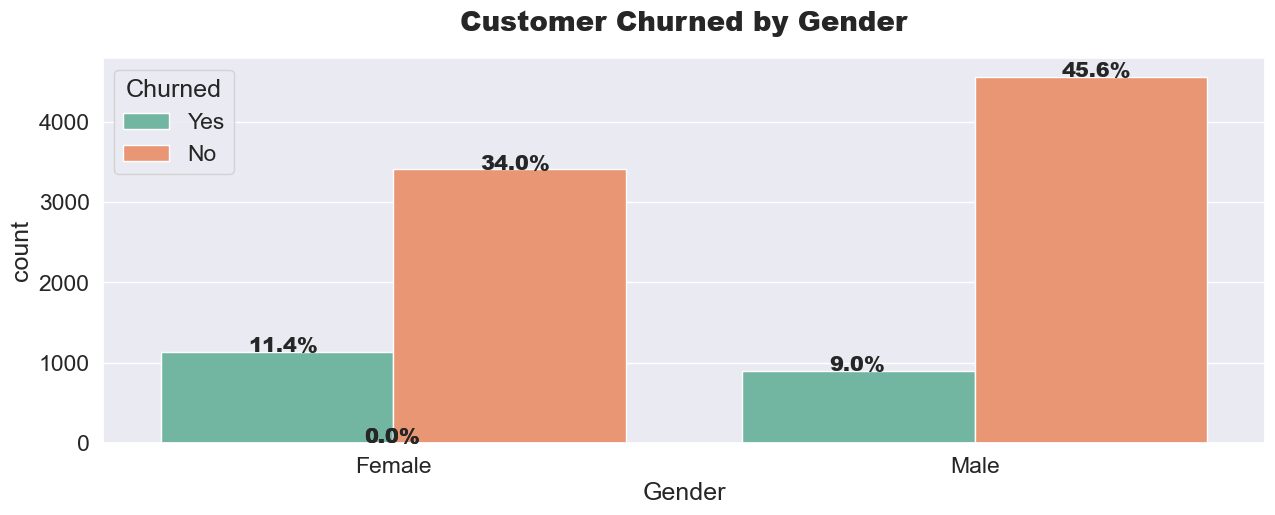

In [17]:
countplot("Gender")

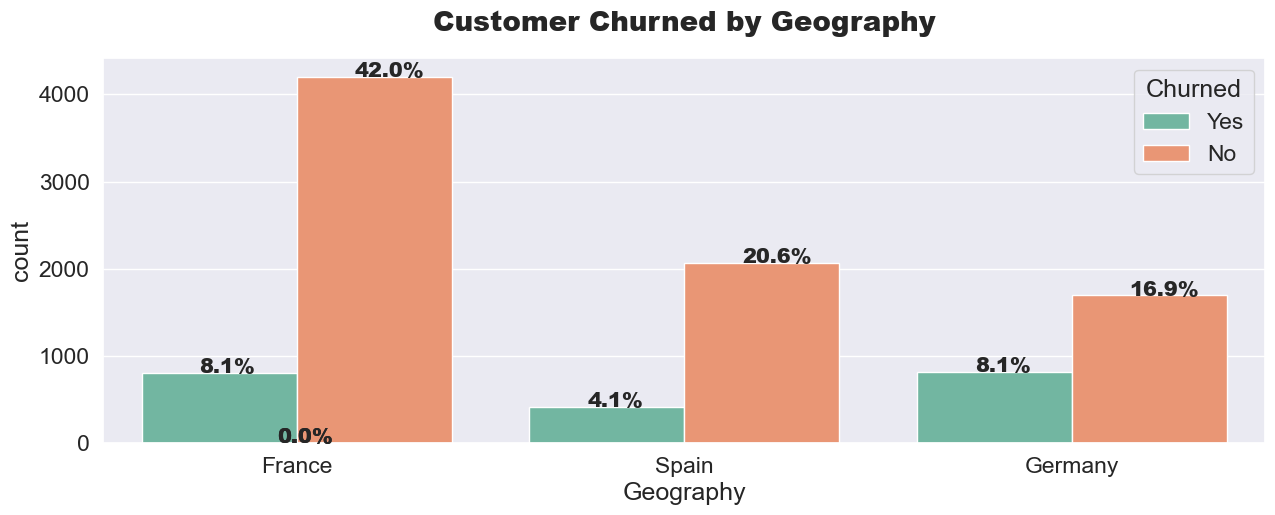

In [18]:
countplot("Geography")

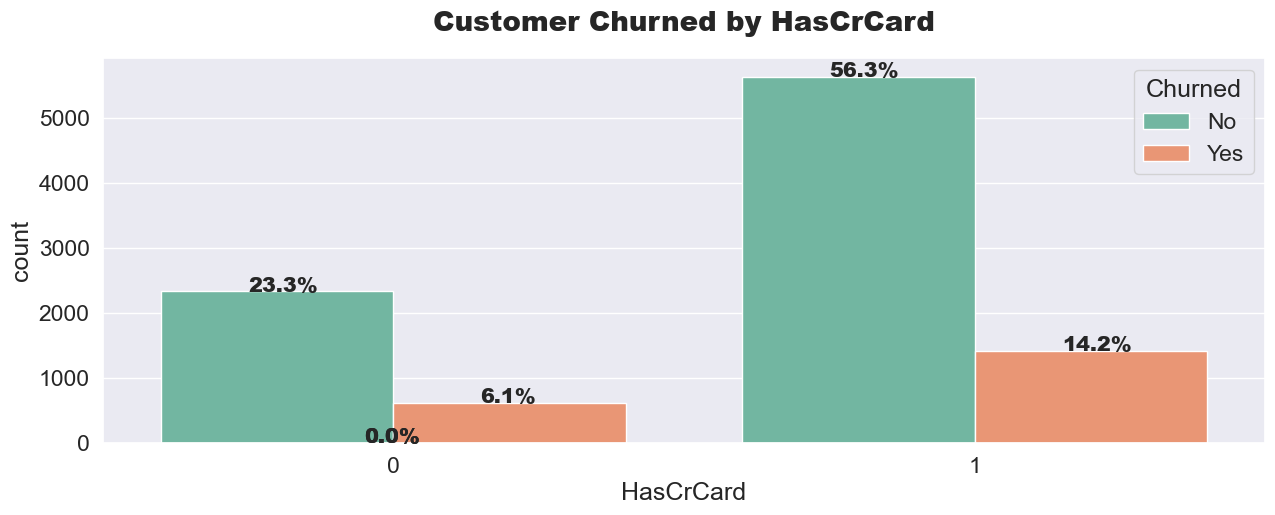

In [19]:
countplot("HasCrCard")

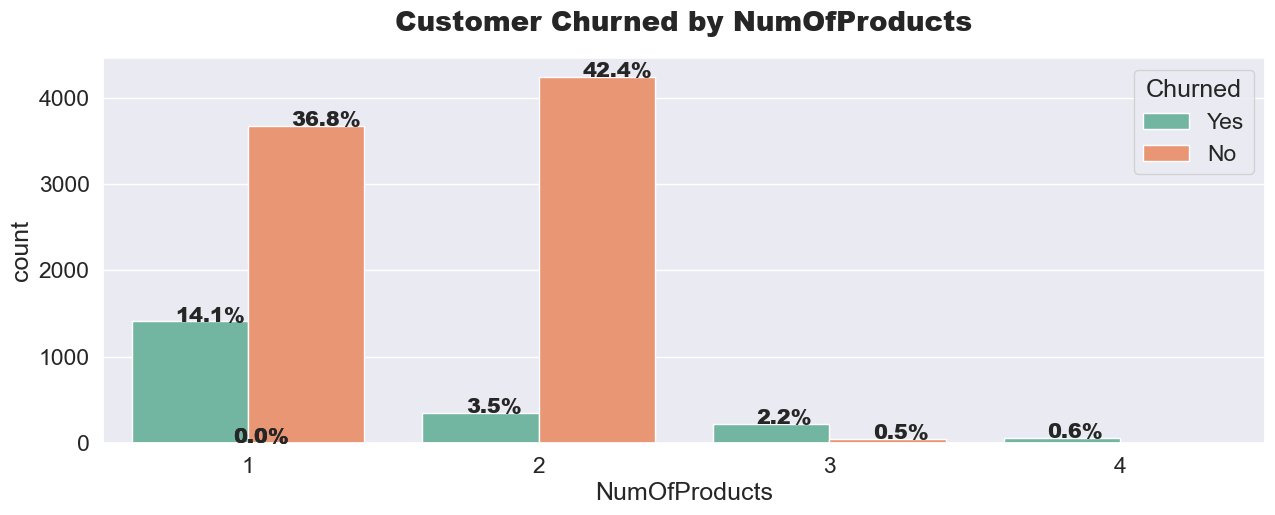

In [20]:
countplot("NumOfProducts")

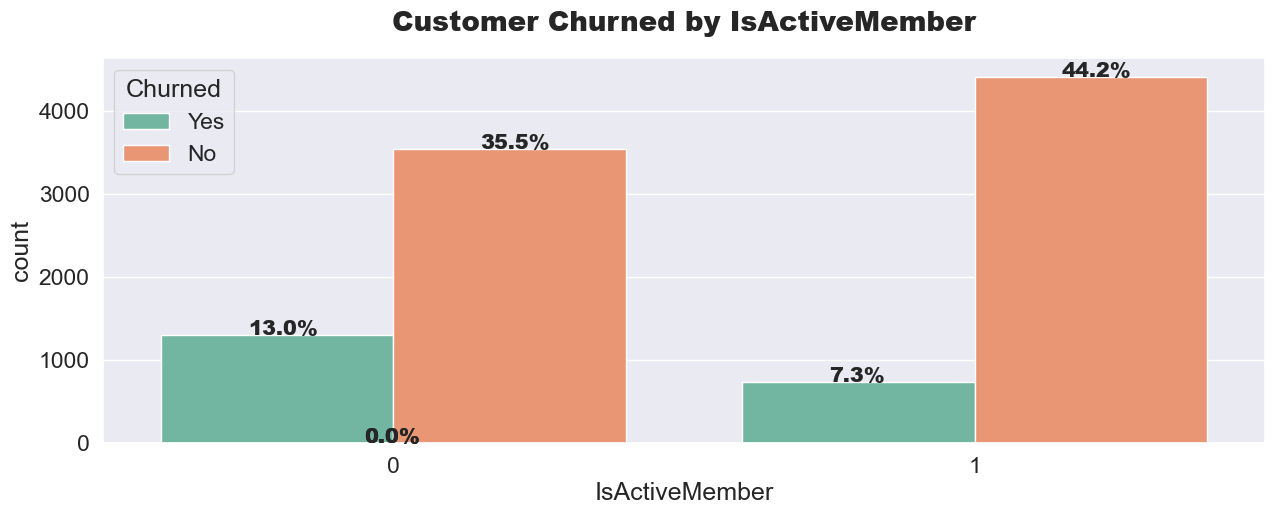

In [21]:
countplot("IsActiveMember")

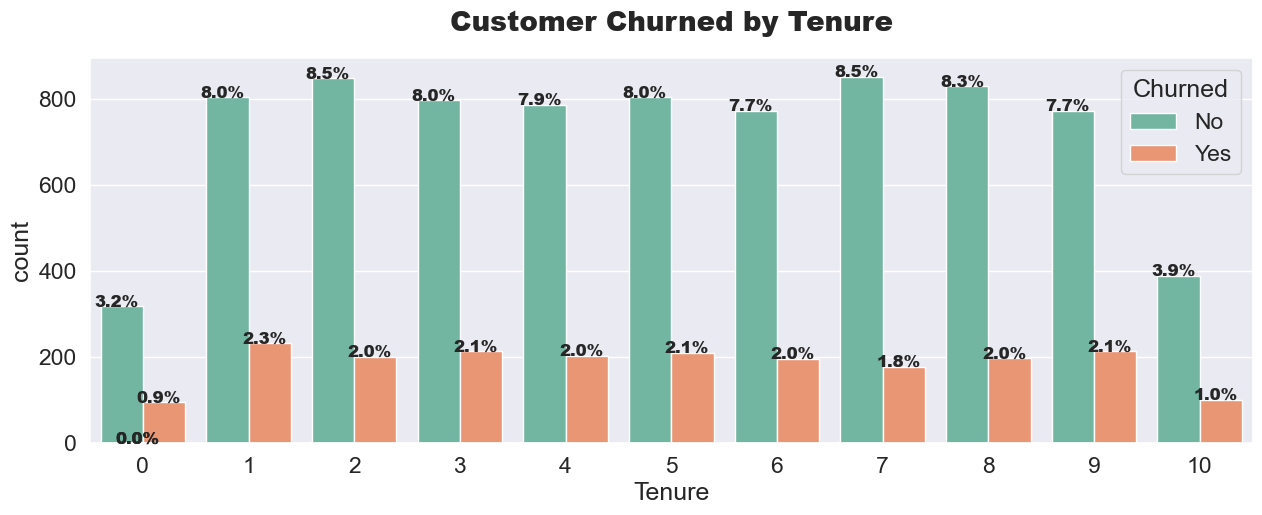

In [22]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Tenure", data=df, hue="Churned",palette="Set2")
for value in ax.patches:
    percentage = "{:.1f}%".format(100*value.get_height()/len(df["Tenure"]))
    x = value.get_x() + value.get_width() / 2 - 0.05
    y = value.get_y() + value.get_height()
    ax.annotate(percentage, (x,y), fontweight="black",size=12, ha="center")

plt.title("Customer Churned by Tenure",fontweight="black",size=20,pad=20)
plt.show()

In [23]:
df["Churned"]

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
9995     No
9996     No
9997    Yes
9998    Yes
9999     No
Name: Churned, Length: 10000, dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Churned          10000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


In [25]:
def continous_plot(column):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(x=column, hue="Churned", data=df, kde=True, palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)

    plt.subplot(1,2,2)
    sns.boxplot(x="Churned", y=column, data=df, palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)
    plt.tight_layout()
    plt.show()



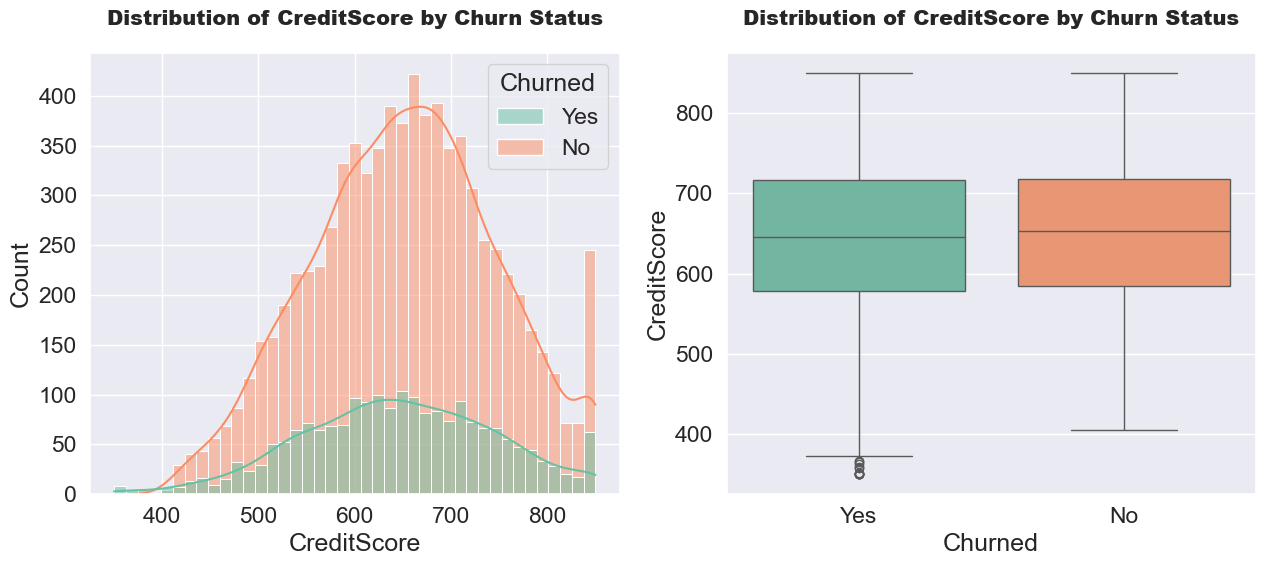

In [26]:
continous_plot("CreditScore")

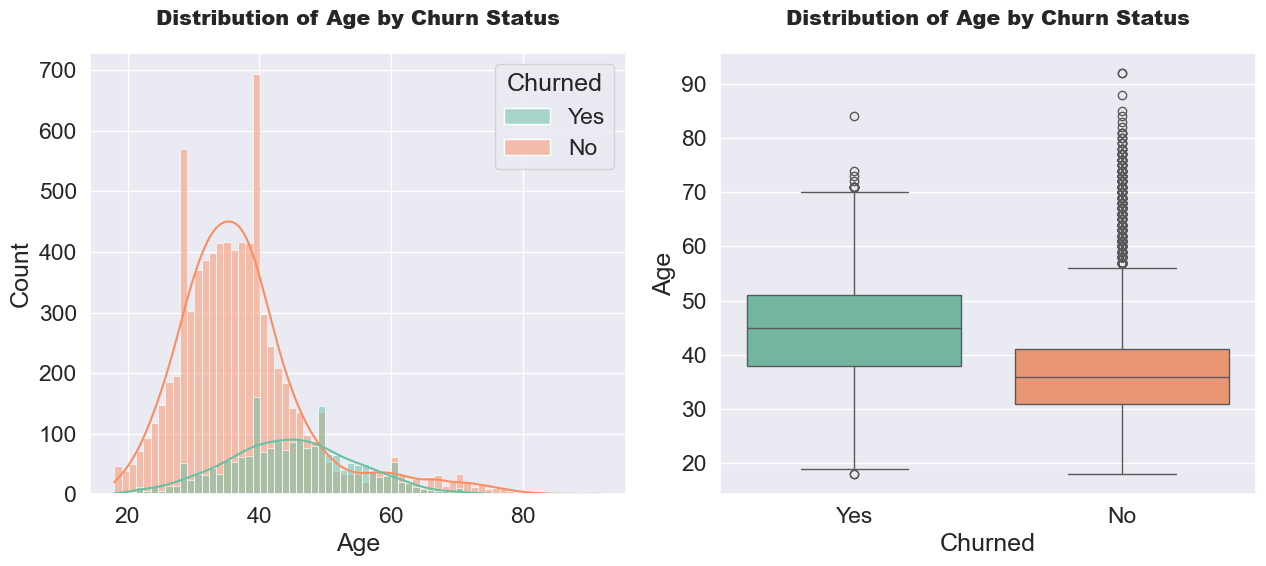

In [27]:
continous_plot("Age")

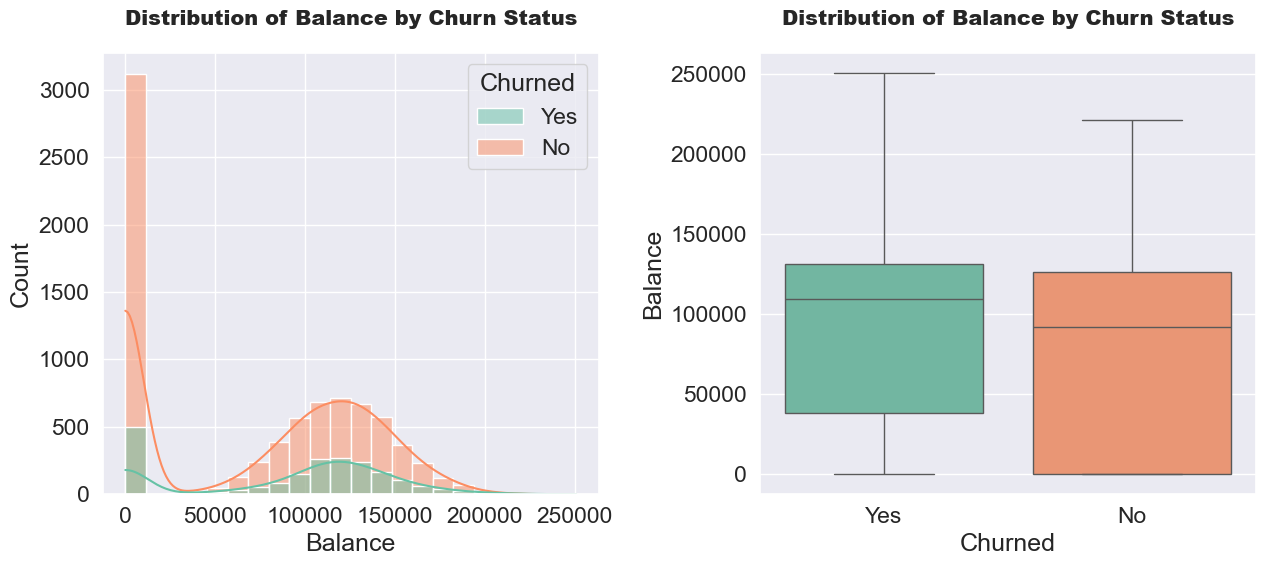

In [28]:
continous_plot("Balance")

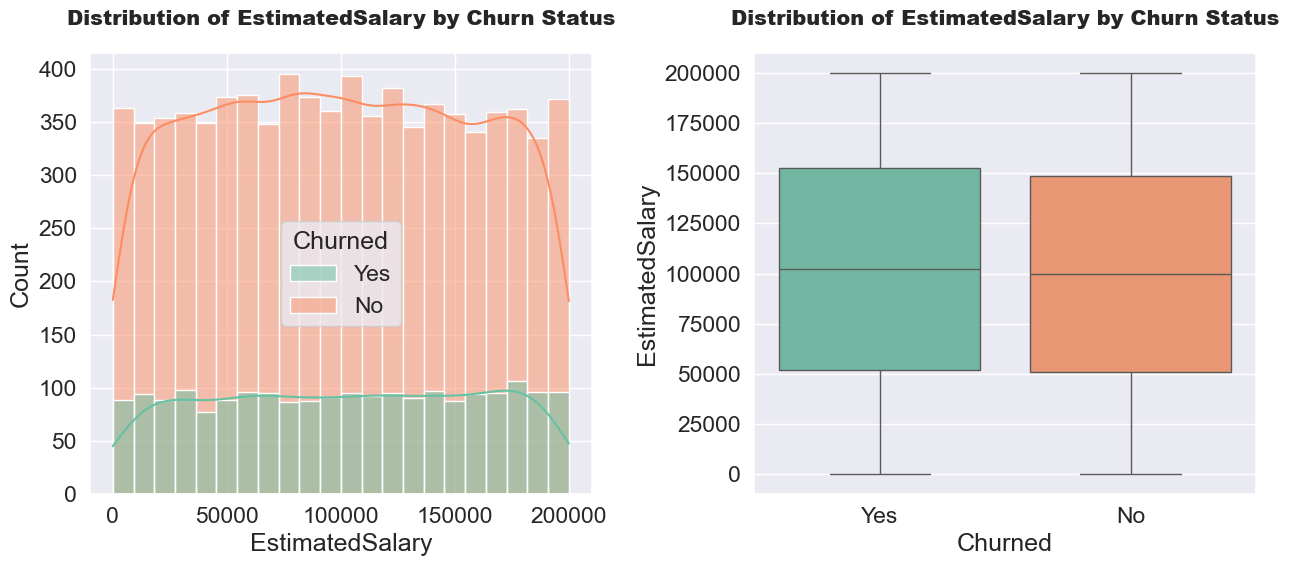

In [29]:
continous_plot("EstimatedSalary")

### Feature Engineering
-   Creating new feature from "NumOfProducts" feature

In [30]:
conditions = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]
values = ["One Product", "Two Products", "More Than 2 Products"]

In [31]:
df["Total_Products"] = np.select(conditions, values)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Total_Products
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes,One Product
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No,One Product
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes,More Than 2 Products
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No,Two Products
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No,One Product


In [32]:
df.drop(columns="NumOfProducts", inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Total_Products
0,619,France,Female,42,2,0.00,1,1,101348.88,Yes,One Product
1,608,Spain,Female,41,1,83807.86,0,1,112542.58,No,One Product
2,502,France,Female,42,8,159660.80,1,0,113931.57,Yes,More Than 2 Products
3,699,France,Female,39,1,0.00,0,0,93826.63,No,Two Products
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,No,One Product


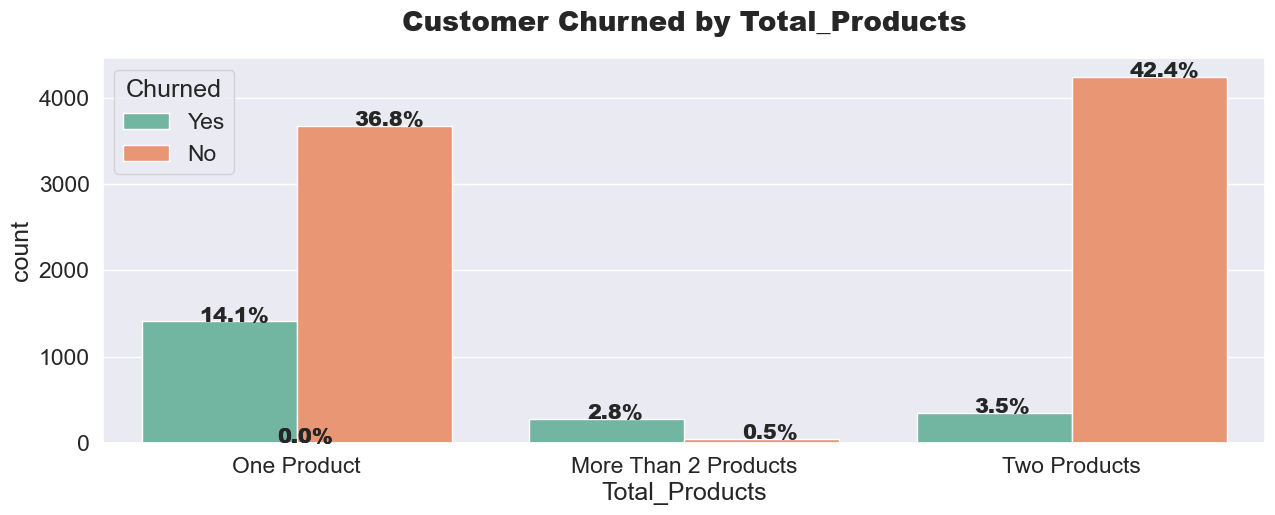

In [33]:
countplot("Total_Products")

-   Creating new feature from "Balance Feature"

In [34]:
conditions = [(df["Balance"]==0), (df["Balance"]>0)]
values = ["Zero Balance", "More Than Zero Balance"]

In [35]:
df["Account_Balance"] = np.select(conditions, values)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Total_Products,Account_Balance
0,619,France,Female,42,2,0.00,1,1,101348.88,Yes,One Product,Zero Balance
1,608,Spain,Female,41,1,83807.86,0,1,112542.58,No,One Product,More Than Zero Balance
2,502,France,Female,42,8,159660.80,1,0,113931.57,Yes,More Than 2 Products,More Than Zero Balance
3,699,France,Female,39,1,0.00,0,0,93826.63,No,Two Products,Zero Balance
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,No,One Product,More Than Zero Balance


In [36]:
df.drop(columns="Balance", inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Total_Products,Account_Balance
0,619,France,Female,42,2,1,1,101348.88,Yes,One Product,Zero Balance
1,608,Spain,Female,41,1,0,1,112542.58,No,One Product,More Than Zero Balance
2,502,France,Female,42,8,1,0,113931.57,Yes,More Than 2 Products,More Than Zero Balance
3,699,France,Female,39,1,0,0,93826.63,No,Two Products,Zero Balance
4,850,Spain,Female,43,2,1,1,79084.10,No,One Product,More Than Zero Balance


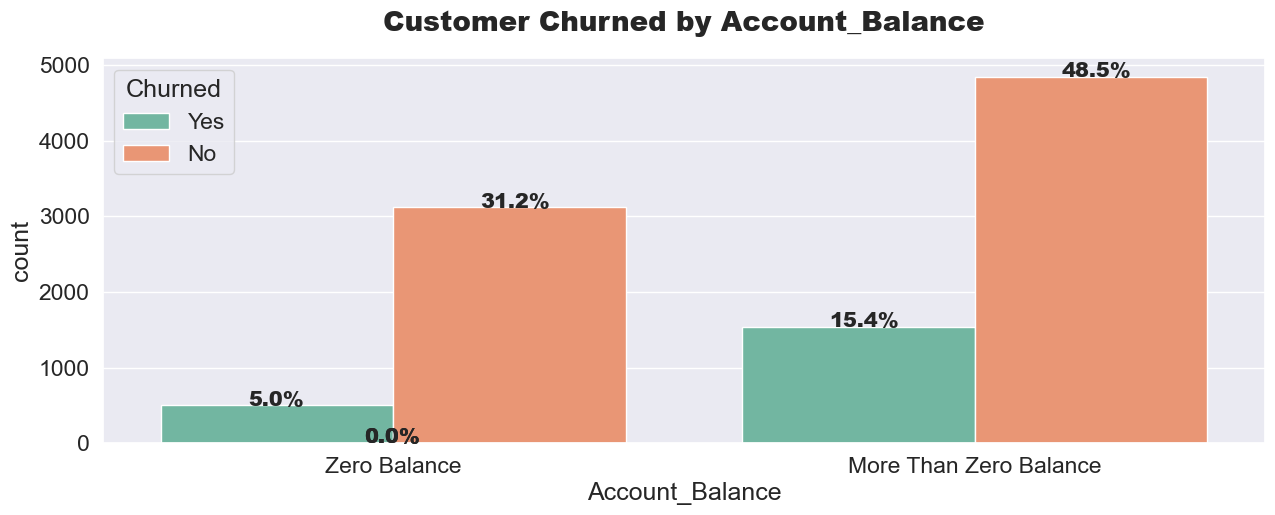

In [37]:
countplot("Account_Balance")

### Data Preprocessing

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Churned          10000 non-null  object 
 9   Total_Products   10000 non-null  object 
 10  Account_Balance  10000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 859.5+ KB


In [39]:
cat_cols = ["Geography", "Gender", "Total_Products", "Account_Balance"]
for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())
    print("-"*100,"\n")

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
---------------------------------------------------------------------------------------------------- 

Unique Values in Gender column is: ['Female' 'Male']
---------------------------------------------------------------------------------------------------- 

Unique Values in Total_Products column is: ['One Product' 'More Than 2 Products' 'Two Products']
---------------------------------------------------------------------------------------------------- 

Unique Values in Account_Balance column is: ['Zero Balance' 'More Than Zero Balance']
---------------------------------------------------------------------------------------------------- 



-   Performing one hot encoding on Categorical features 

In [40]:
df = pd.get_dummies(columns=cat_cols, data=df)
#   convert categorical column to many columns that have all unique values of them

In [41]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One Product,Total_Products_Two Products,Account_Balance_More Than Zero Balance,Account_Balance_Zero Balance
0,619,42,2,1,1,101348.88,Yes,True,False,False,True,False,False,True,False,False,True
1,608,41,1,0,1,112542.58,No,False,False,True,True,False,False,True,False,True,False
2,502,42,8,1,0,113931.57,Yes,True,False,False,True,False,True,False,False,True,False
3,699,39,1,0,0,93826.63,No,True,False,False,True,False,False,False,True,False,True
4,850,43,2,1,1,79084.10,No,False,False,True,True,False,False,True,False,True,False


-   encoding target variable.

In [42]:
df["Churned"].replace({"No":0, "Yes":1}, inplace=True)
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One Product,Total_Products_Two Products,Account_Balance_More Than Zero Balance,Account_Balance_Zero Balance
0,619,42,2,1,1,101348.88,1,True,False,False,True,False,False,True,False,False,True
1,608,41,1,0,1,112542.58,0,False,False,True,True,False,False,True,False,True,False
2,502,42,8,1,0,113931.57,1,True,False,False,True,False,True,False,False,True,False
3,699,39,1,0,0,93826.63,0,True,False,False,True,False,False,False,True,False,True
4,850,43,2,1,1,79084.10,0,False,False,True,True,False,False,True,False,True,False


-   Checking sknewness of Continous Features.

In [43]:
cols = ["CreditScore", "Age", "EstimatedSalary"]

In [44]:
df[cols].skew().to_frame().rename(columns={0:"Feature Sknewness"})

,Feature Sknewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


-   Performing log transformation on Age column.

In [45]:
old_age = df["Age"]  #storing the previous Age values to compare these values with the transformer values.

In [46]:
df["Age"] = np.log(df["Age"])

-   Visualizing Age before and after tranformation.

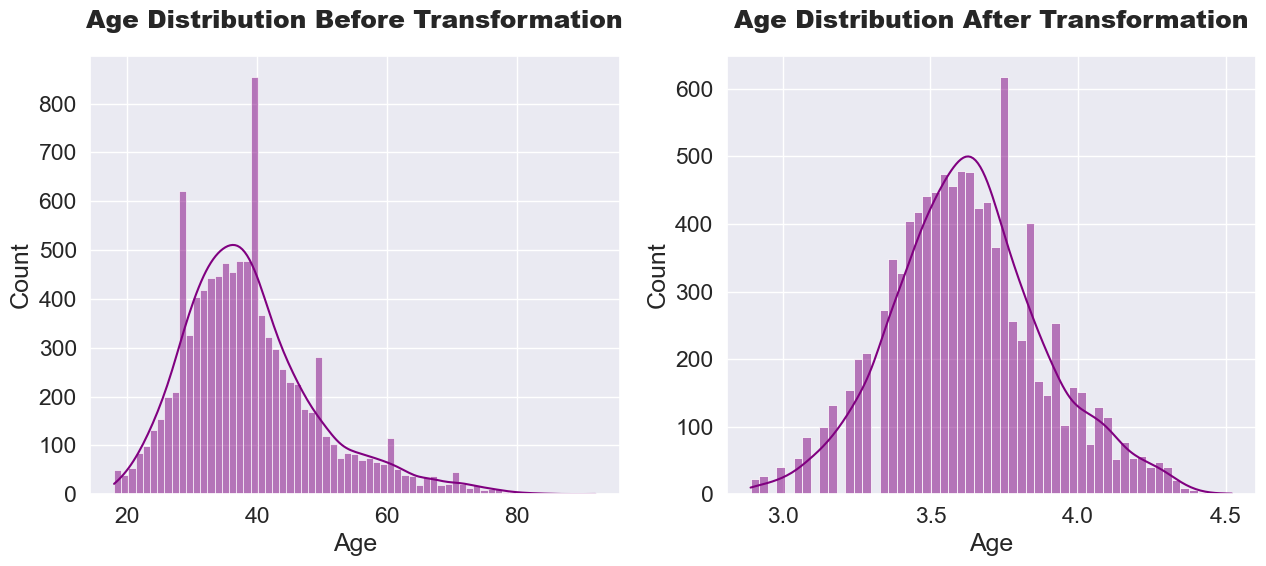

In [47]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="purple", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="purple", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

-   Segregating features & labels for Model Training

In [48]:
X = df.drop(columns="Churned")
y = df["Churned"]

In [49]:
#   splitting data for Model Traning and Testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
print("Shape of x_train is ", x_train.shape)
print("Shape of x_test is ", x_test.shape)
print("Shape of y_train is ", y_train.shape)
print("Shape of y_test is ", y_test.shape)

Shape of x_train is  (8000, 16)
Shape of x_test is  (2000, 16)
Shape of y_train is  (8000,)
Shape of y_test is  (2000,)


In [51]:
#   it is skewed between values 0 an 1
y_train.value_counts()

Churned
0    6368
1    1632
Name: count, dtype: int64

In [52]:
# Applying SMOTE to overcome the class-imbalance in taget variable
smt = SMOTE(random_state=42)

In [53]:
x_train_resampled, y_train_resampled = smt.fit_resample(x_train, y_train)
print(x_train_resampled.shape, y_train_resampled.shape)

(12736, 16) (12736,)


In [54]:
y_train_resampled.value_counts().to_frame()

,count
Churned,
0,6368
1,6368


### Model creation using Decision Tree

In [55]:
#   perfoming Grid-Search with cross-validation on find the best Parameters for the Model.
#rfc = RandomForestClassifier()
dtree = DecisionTreeClassifier()

In [56]:
# param_grid = {"max_depth": [3,4,5,6,7,8],
#               "min_samples_split": [3,4,5,6,7,8],
#               "min_samples_leaf": [3,4,5,6,7,8],
#               "n_estimators": [50, 70, 90, 100],
#               "criterion": ["gini", "entropy"]}
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None],
              "random_state":[0,42]}

In [57]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [58]:
best_parameters = grid_search.best_params_

print("Best Parameters for DecisionTree Model is:\n\n")
best_parameters

Best Parameters for DecisionTree Model is:




{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'random_state': 0,
 'splitter': 'random'}

In [59]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=10, min_samples_split=8, random_state=0,
                       splitter='random')

In [60]:
y_train_pred = dtree.predict(x_train_resampled)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 89.85 %
Accuracy Score of Model on Testing Data  is => 83.65 %


In [61]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.8365
Recall Score of the Model is => 0.8365
Precision Score of the Model is => 0.8365


In [62]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":dtree.feature_importances_})

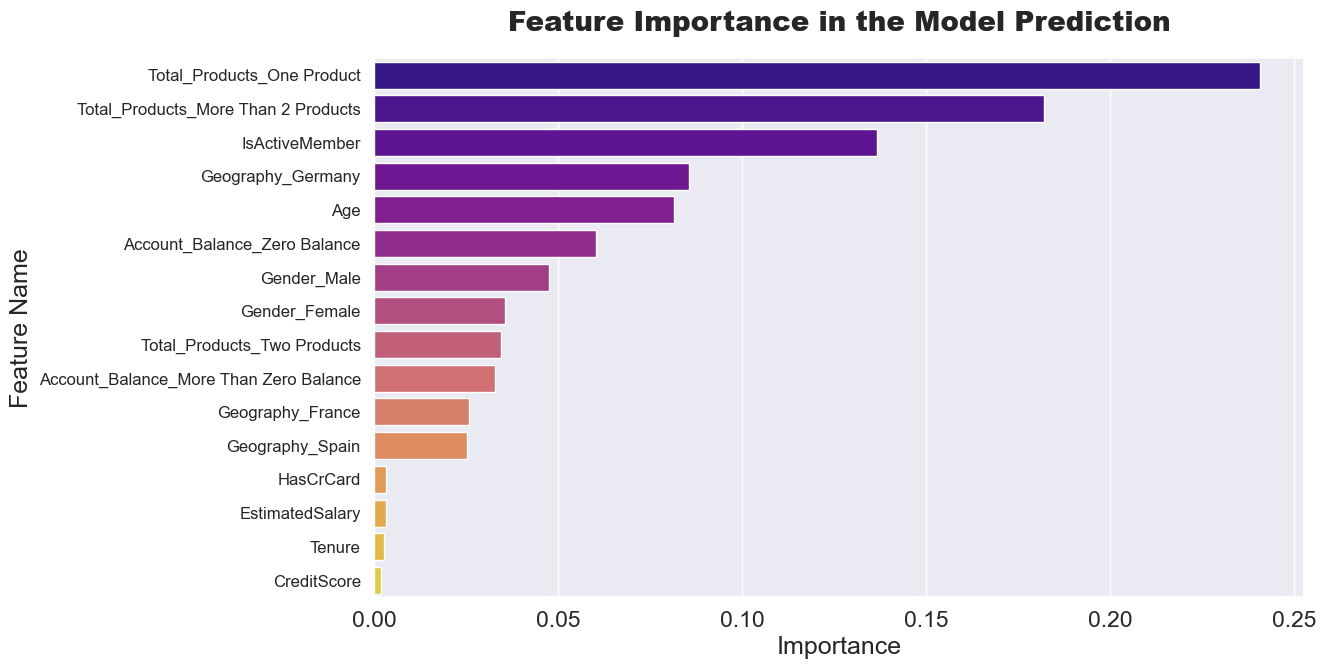

In [63]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

In [64]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(x_test)



In [65]:
x_test.head().values

array([[597, 3.5553480614894135, 8, 1, 1, 192852.67, False, True, False,
        True, False, False, True, False, True, False],
       [523, 3.6888794541139363, 2, 1, 0, 128702.1, True, False, False,
        True, False, False, True, False, True, False],
       [706, 3.7376696182833684, 8, 1, 1, 75732.25, False, False, True,
        True, False, False, True, False, True, False],
       [788, 3.4657359027997265, 4, 0, 0, 89368.59, True, False, False,
        False, True, False, True, False, True, False],
       [706, 3.6375861597263857, 5, 1, 1, 135662.17, False, True, False,
        False, True, False, False, True, True, False]], dtype=object)

In [66]:
shap_values[5]

array([[-0.00190141,  0.00190141],
       [-0.34380375,  0.34380375],
       [-0.00412221,  0.00412221],
       [ 0.00233388, -0.00233388],
       [-0.18264395,  0.18264395],
       [ 0.00333868, -0.00333868],
       [ 0.00369002, -0.00369002],
       [ 0.02873487, -0.02873487],
       [-0.0619676 ,  0.0619676 ],
       [-0.01743562,  0.01743562],
       [ 0.00964183, -0.00964183],
       [ 0.04142515, -0.04142515],
       [ 0.21928076, -0.21928076],
       [-0.096318  ,  0.096318  ],
       [-0.12178149,  0.12178149],
       [ 0.02152886, -0.02152886]])

In [67]:
x_test.columns

Index(['CreditScore', 'Age', 'Tenure', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'Total_Products_More Than 2 Products', 'Total_Products_One Product',
       'Total_Products_Two Products', 'Account_Balance_More Than Zero Balance',
       'Account_Balance_Zero Balance'],
      dtype='object')

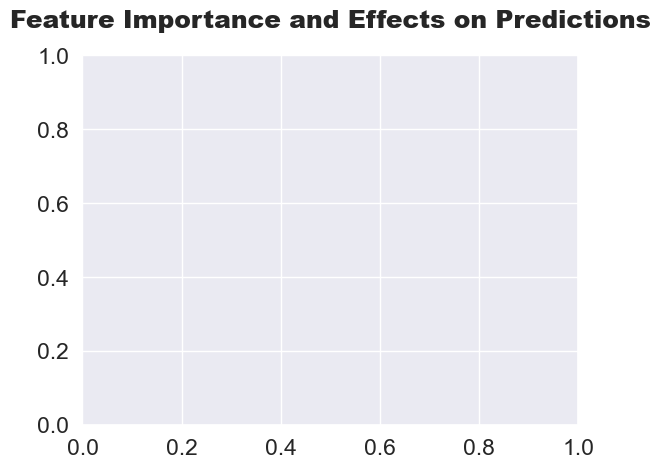

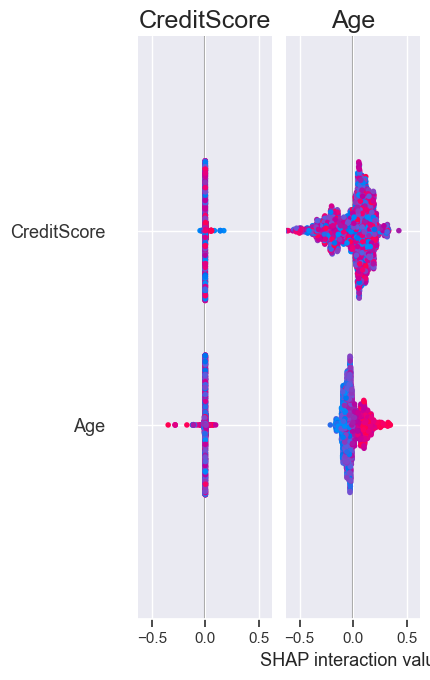

In [68]:
feature_columns = x_test.columns
plt.title("Feature Importance and Effects on Predictions",fontweight="black",pad=20,size=18)
shap.summary_plot(shap_values, x_test, feature_names = feature_columns,plot_size=(14,8))

In [69]:
rfc = RandomForestClassifier()

In [70]:
param_grid = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[3,4,5,6,7,8],
              "min_samples_leaf":[3,4,5,6,7,8],
              "n_estimators": [50,70,90,100],
              "criterion":["gini","entropy"]}

In [71]:
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 70, 90, 100]})

In [72]:
best_parameters = grid_search.best_params_

print("Best Parameters for RandomForest Model is:\n\n")
best_parameters

Best Parameters for RandomForest Model is:




{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 70}

In [73]:
rfc = RandomForestClassifier(**best_parameters)

rfc.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       min_samples_split=8, n_estimators=70)

In [74]:
y_train_pred = rfc.predict(x_train_resampled)
y_test_pred  = rfc.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 90.25 %
Accuracy Score of Model on Testing Data  is => 84.3 %


In [75]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.843
Recall Score of the Model is => 0.843
Precision Score of the Model is => 0.843


In [76]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":rfc.feature_importances_})

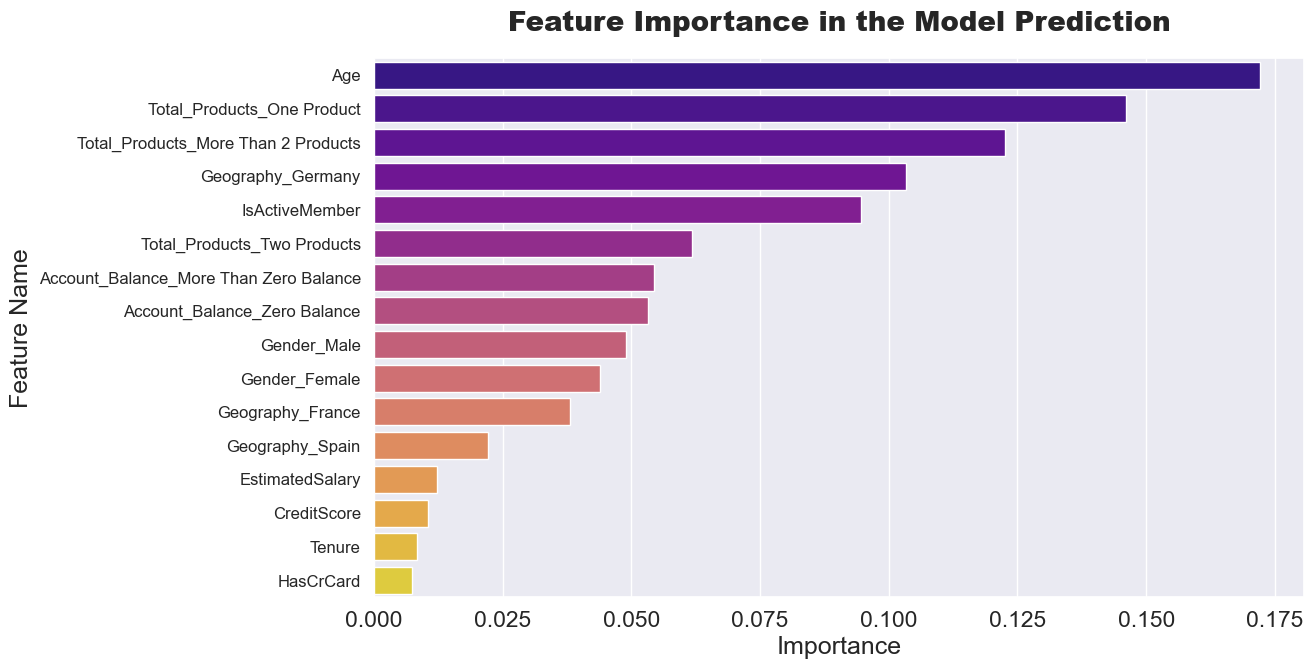

In [77]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

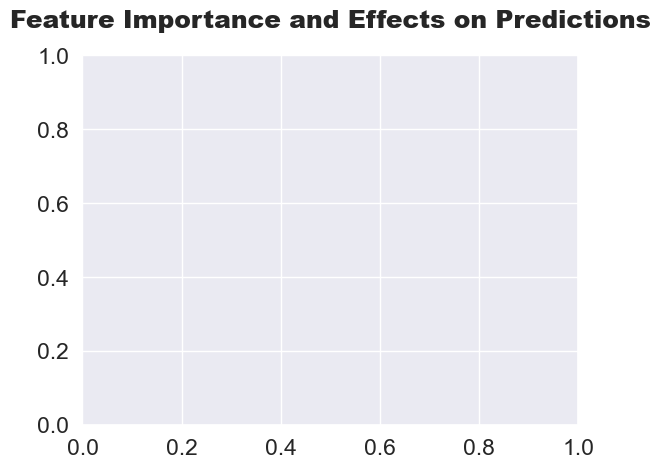

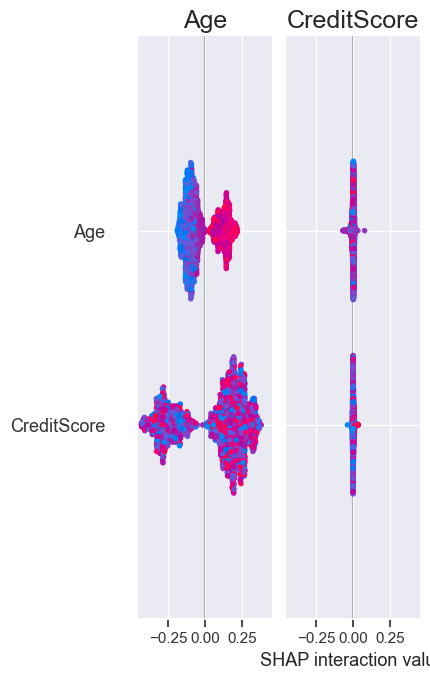

In [82]:
###
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_test)

plt.title("Feature Importance and Effects on Predictions",fontweight="black",pad=20,size=18)
shap.summary_plot(shap_values, x_test, feature_names = x_test.columns,plot_size=(14,8))

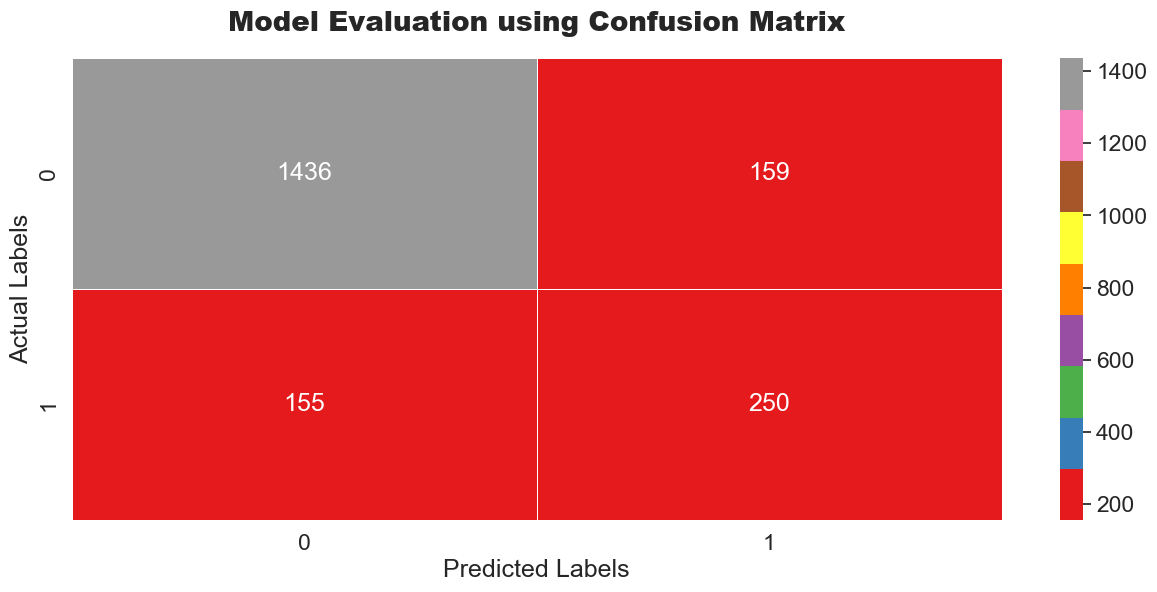

In [83]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

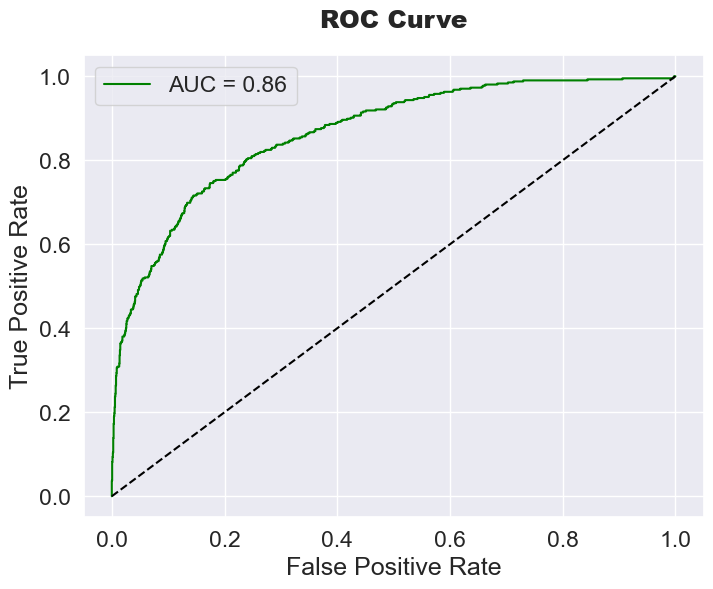

In [84]:
y_pred_proba = rfc.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

In [85]:
x_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12736 entries, 0 to 12735
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CreditScore                             12736 non-null  int64  
 1   Age                                     12736 non-null  float64
 2   Tenure                                  12736 non-null  int64  
 3   HasCrCard                               12736 non-null  int64  
 4   IsActiveMember                          12736 non-null  int64  
 5   EstimatedSalary                         12736 non-null  float64
 6   Geography_France                        12736 non-null  bool   
 7   Geography_Germany                       12736 non-null  bool   
 8   Geography_Spain                         12736 non-null  bool   
 9   Gender_Female                           12736 non-null  bool   
 10  Gender_Male                             12736 non-null  bo

In [87]:
x_train.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One Product,Total_Products_Two Products,Account_Balance_More Than Zero Balance,Account_Balance_Zero Balance
7389,667,3.526361,5,1,0,163830.64,False,False,True,True,False,False,False,True,False,True
9275,427,3.737670,1,1,1,57098.00,False,True,False,False,True,False,True,False,True,False
2995,535,3.367296,2,1,0,185630.76,True,False,False,True,False,False,True,False,True,False
5316,654,3.688879,5,1,0,173617.09,False,False,True,False,True,False,True,False,True,False
356,850,4.043051,8,1,1,132298.49,False,False,True,True,False,False,False,True,True,False


In [86]:
def predict_churn(model, input_features):
    # Preprocess input features
    input_df = pd.DataFrame([input_features], columns=x_test.columns)
    
    # Make predictions
    predictions = model.predict(input_df)
    
    return predictions

# Example usage of the function
input_features = [597, 3.5553480614894135, 8, 1, 1, 192852.67, False, True, False, True, False, False, True, False, True, False]

# Assuming 'rfc' is your trained RandomForestClassifier
prediction = predict_churn(rfc, input_features)
print("Predicted churn:", prediction)

Predicted churn: [0]


In [88]:
# Example usage of the function
input_features = [100, 21, 1, 1, 1, 1000.67, False, True, False, True, False, False, True, False, True, False]

# Assuming 'rfc' is your trained RandomForestClassifier
prediction = predict_churn(rfc, input_features)
print("Predicted churn:", prediction)

Predicted churn: [1]
